Trong notebook này, chúng ta sẽ tập trung vào việc xử lý bài toán mất cân bằng dữ liệu như nào. Bài toán chúng ta áp dụng sẽ là phát hiện gian lận tín dụng. Dưới đây là một số thông tin về bài toán:
- Link tải dữ liệu: https://www.kaggle.com/mlg-ulb/creditcardfraud
- Thông tin các đặc trưng:
    + Time: thời gian thực hiện giao dịch
    + Amount: lượng tiền thực hiện giao dịch
    + V1, ..., V28: các đặc trưng đã qua PCA để giảm chiều dữ liệu
- Thông tin nhãn:
    + Class: có phải gian lận hay không. Trong đó, 1 là có và 0 là không




In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Gọi các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Import các metrics cần thiết
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #f1, recall, pre
from sklearn.metrics import confusion_matrix

# Gọi các model cần thiết cho bài toán classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression

# Sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

In [ ]:
# Truy cập vào project
%cd /content/gdrive/MyDrive/Teaching/BKHN-Teaching/2/Xử lý mất cân bằng dữ liệu

/content/gdrive/MyDrive/Teaching/BKHN-Teaching/2/Xử lý mất cân bằng dữ liệu


In [ ]:
# Đọc file dữ liệu csv
data = pd.read_csv(r"data/creditcard.csv")
# Hiển thị n samples trong file csv
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### Overview: Xem xét có NULL value ở các trường không, khoảng giá trị ở các trường, số dữ liệu cho mỗi class

In [ ]:
# Miêu tả dữ liệu
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Số transaction có gian lận tín dụng: 492 và không có gian lận tín dụng: 284315
Tỉ lệ giữa không gian lận và gian lận: 577.8760162601626


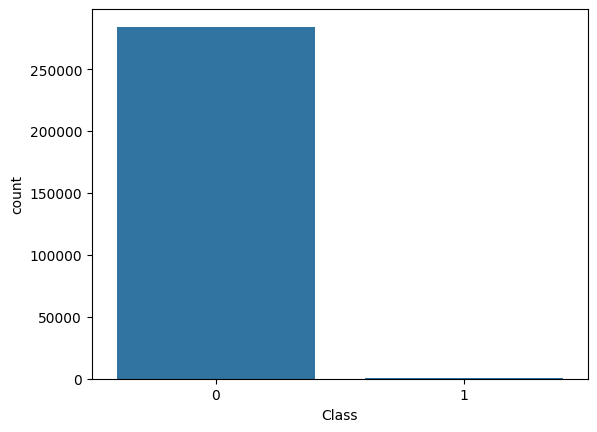

In [ ]:
# Vẽ biểu diễn số dữ liệu cho mỗi class
sns.countplot(x= "Class", data= data)
fraud = len(data[data.Class == 1])
no_fraud = len(data[data.Class == 0])

print("Số transaction có gian lận tín dụng: {} và không có gian lận tín dụng: {}".format(fraud, no_fraud))
print("Tỉ lệ giữa không gian lận và gian lận: {}".format(no_fraud/fraud))

### Chuyện gì xảy ra nếu ta trực tiếp sử dụng bộ data bị lệch lớn như này để train model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Class"], axis = 1), data["Class"], test_size = 0.3, random_state = 0)

#### Thử với LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 99.89583699074237 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.70      0.69      0.69       147

    accuracy                           1.00     85443
   macro avg       0.85      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



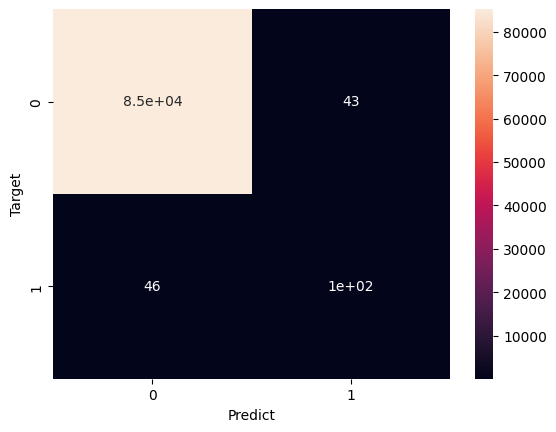

In [ ]:
logis_model = LogisticRegression(max_iter=100)
logis_model.fit(X_train, y_train)

y_pred = logis_model.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

#### Thử RandomForest

Accuracy score: 99.94967405170698 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



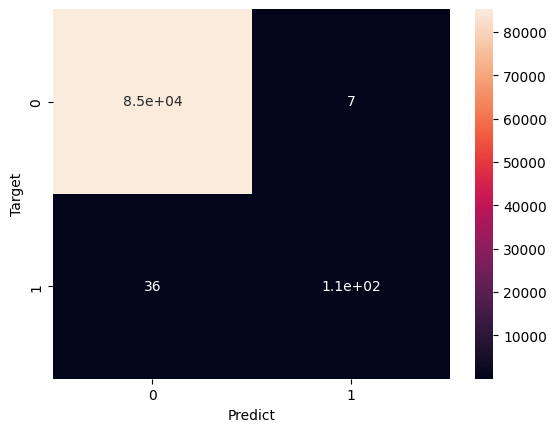

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

##### Phân tích kết quả trên:
- Đối với bài toán nhận diện gian lận tín dụng này, ta cần ưu tiên giá trị recall score của class 1
- Recall = TP/(TP + FN).

Chú thích:
+ TP: dương tính thật, FP: âm tính bị nhận thành dương tính
+ TN: âm tính thật, FN: dương tính bị nhận thành âm tính

Do đó, vì nếu recall cao tức là cứ hễ có gian lận tín dụng là ta bắt được.
Tuy nhiên, giá trị recall ở kết quả trên khá là thấp với 63%, 76%
--> Cách tiếp cận train model với dữ liệu không cân bằng như này là không khả quan

### Tìm cách làm cân bằng lại dữ liệu: OverSampling, UnderSampling, SMOTE

#### OverSampling
Phương thức hoạt động là giải pháp này nhân bản một cách ngẫu nhiên các phần tử trong lớp nhỏ hơn để tạo sụ cân bằng dữ liệu
#### UnderSampling
Phương thức hoạt động là giải pháp này sẽ xóa một cách ngẫu nhiên một số phần từ trong lớp lớn hơn để tạo sự cân bằng dữ liệu
#### SMOTE
Phương thức hoạt động là đầu tiên nó chọn ngẫu nhiên 1 điểm trong tập nhỏ hơn sau đó áp dụng K-nearest-neighbors để tìm các láng giềng gần của nó và tạo ra 1 dữ liệu mới từ đó.

In [ ]:
# Tách thành 2 bộ train và test trước
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Class"], axis = 1), data["Class"], test_size = 0.3, random_state = 0)

##### UnderSampling

Số transaction có gian lận tín dụng: 345 và không có gian lận tín dụng: 199019
Tỉ lệ giữa không gian lận và gian lận: 576.8666666666667


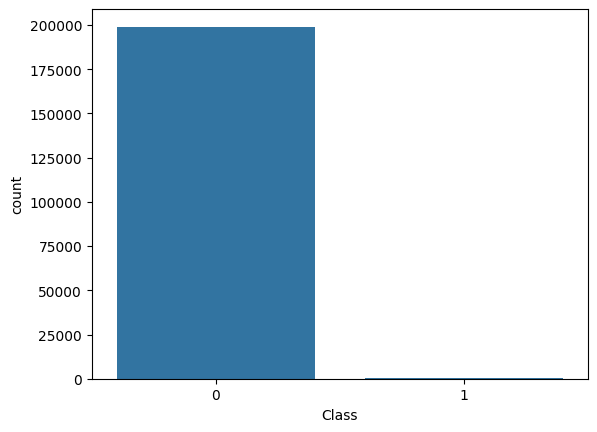

In [ ]:
train_data = X_train.copy()
train_data["Class"] = y_train

# Vẽ biểu diễn số dữ liệu cho mỗi class trong train_data
sns.countplot(x= "Class", data= train_data)
fraud = len(train_data[train_data.Class == 1])
no_fraud = len(train_data[train_data.Class == 0])

print("Số transaction có gian lận tín dụng: {} và không có gian lận tín dụng: {}".format(fraud, no_fraud))
print("Tỉ lệ giữa không gian lận và gian lận: {}".format(no_fraud/fraud))


In [ ]:
# Chỉ giữ lại 345 điểm dữ liệu cho class 0:
clus_centroid = ClusterCentroids(sampling_strategy={0: 345})
X_under, y_under = clus_centroid.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Số transaction có gian lận tín dụng: 345 và không có gian lận tín dụng: 345
Tỉ lệ giữa không gian lận và gian lận: 1.0


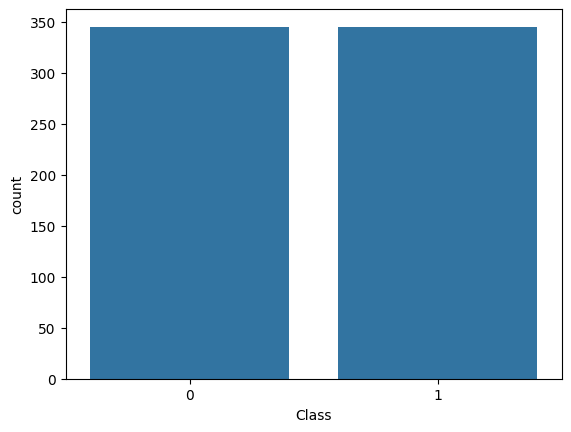

In [ ]:
train_data = X_under.copy()
train_data["Class"] = y_under

# Vẽ biểu diễn số dữ liệu cho mỗi class trong train_data
sns.countplot(x= "Class", data= train_data)
fraud = len(train_data[train_data.Class == 1])
no_fraud = len(train_data[train_data.Class == 0])

print("Số transaction có gian lận tín dụng: {} và không có gian lận tín dụng: {}".format(fraud, no_fraud))
print("Tỉ lệ giữa không gian lận và gian lận: {}".format(no_fraud/fraud))

#### Sử dụng LogisticRegression

Accuracy score: 89.54390646395844 %
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     85296
           1       0.02      0.93      0.03       147

    accuracy                           0.90     85443
   macro avg       0.51      0.91      0.49     85443
weighted avg       1.00      0.90      0.94     85443



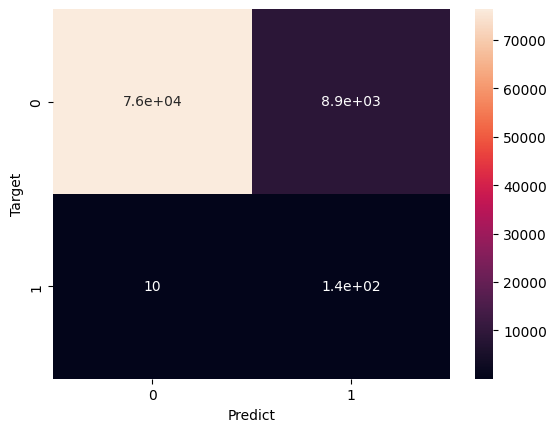

In [ ]:
logis_model_un = LogisticRegression(max_iter=100)
logis_model_un.fit(X_under, y_under)

y_pred = logis_model_un.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

### Sử dụng RandomForest

Accuracy score: 6.96955865313718 %
              precision    recall  f1-score   support

           0       1.00      0.07      0.13     85296
           1       0.00      0.99      0.00       147

    accuracy                           0.07     85443
   macro avg       0.50      0.53      0.07     85443
weighted avg       1.00      0.07      0.13     85443



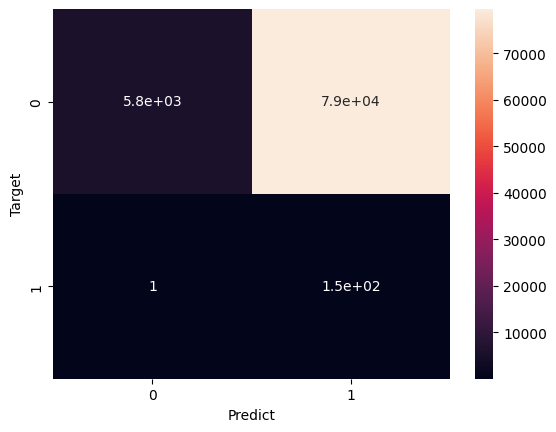

In [ ]:
rf_un = RandomForestClassifier(n_estimators=100, random_state=0)
rf_un.fit(X_under, y_under)

y_pred = rf_un.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

### Sử dụng SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

Số transaction có gian lận tín dụng: 199019 và không có gian lận tín dụng: 199019
Tỉ lệ giữa không gian lận và gian lận: 1.0


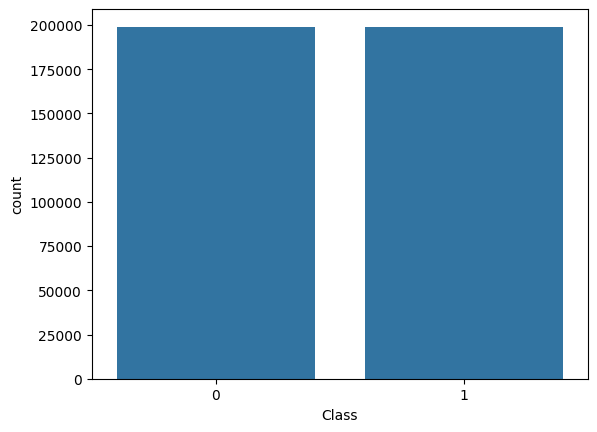

In [ ]:
train_data = X_sm.copy()
train_data["Class"] = y_sm

# Vẽ biểu diễn số dữ liệu cho mỗi class trong train_data
sns.countplot(x= "Class", data= train_data)
fraud = len(train_data[train_data.Class == 1])
no_fraud = len(train_data[train_data.Class == 0])

print("Số transaction có gian lận tín dụng: {} và không có gian lận tín dụng: {}".format(fraud, no_fraud))
print("Tỉ lệ giữa không gian lận và gian lận: {}".format(no_fraud/fraud))

### Sử dụng LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 98.17656215254614 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.87      0.14       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



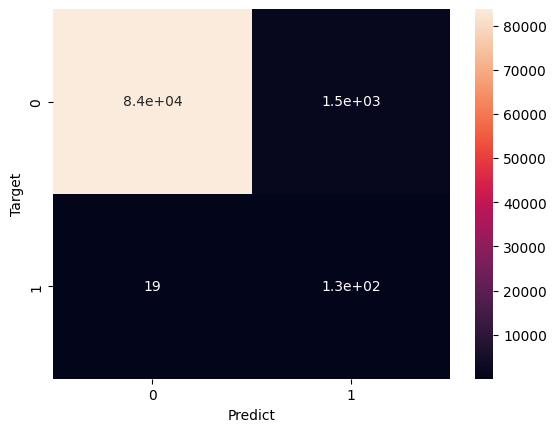

In [ ]:
logis_model_sm = LogisticRegression(max_iter=100)
logis_model_sm.fit(X_sm, y_sm)

y_pred = logis_model_sm.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

#### Sử dụng RandomForest

Accuracy score: 99.9531851643786 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.82      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



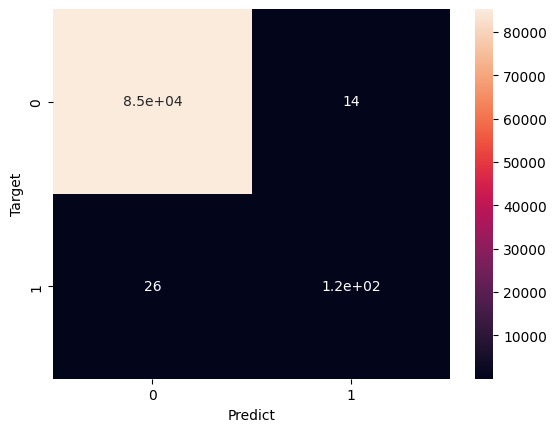

In [ ]:
rf_sm = RandomForestClassifier(n_estimators=100, random_state=0)
rf_sm.fit(X_sm, y_sm)

y_pred = rf_sm.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()